In [1]:
#Mood classification using cnn (Happy / Sad)
#STEPS :-

In [2]:
#Create 3 folder in your desktop
#Training, Testing, Validation
#Inside training create 2 folder as happy or not happy
#Paste all the photo in testing part

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numpy as np
import cv2
import os
## note- image data generator is the package to lable the images & it will automatically lable all the images

In [4]:
img = image.load_img(r"/content/drive/MyDrive/dataset/training/happy/baby girl.jpg")

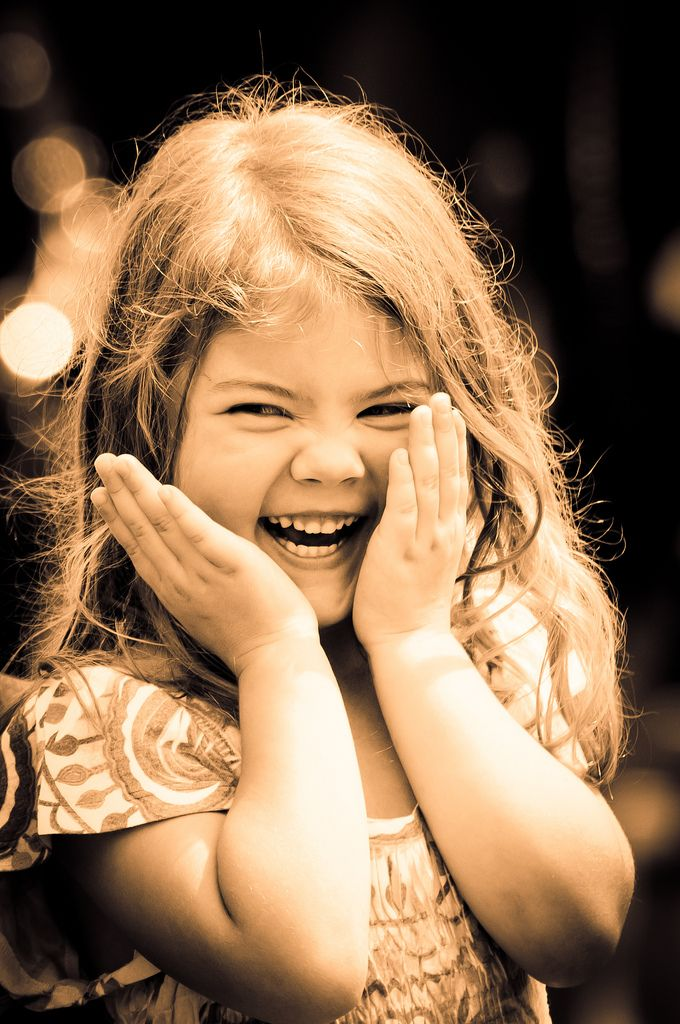

In [5]:
img

In [6]:
i1 = cv2.imread('/content/drive/MyDrive/dataset/training/happy/baby girl.jpg')
i1

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 7,  7, 13],
        [ 7,  7, 13],
        [ 7,  7, 13]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 7,  7, 13],
        [ 7,  7, 13],
        [ 7,  7, 13]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 7,  7, 13],
        [ 7,  7, 13],
        [ 7,  7, 13]]], dtype=uint8)

In [7]:
## note-3 dimension metrics are created for above the image
## the value range from 0-225

In [8]:
i1.shape
# shape of your image height, weight, rgp

(1024, 680, 3)

In [9]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator (rescale = 1/255)
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel

In [10]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/dataset/training",
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset = validation.flow_from_directory(r"/content/drive/MyDrive/dataset/validation",
                                                    target_size = (200,200),
                                                    batch_size = 3,
                                                    class_mode = 'binary')



Found 11 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [11]:
train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [12]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [13]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [15]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 6s 400ms/step - loss: 9.3912 - accuracy: 0.2500
Epoch 2/10
3/3 [==============================] - 0s 181ms/step - loss: 1.1477 - accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 180ms/step - loss: 1.0191 - accuracy: 0.3750
Epoch 4/10
3/3 [==============================] - 1s 226ms/step - loss: 0.8012 - accuracy: 0.2500
Epoch 5/10
3/3 [==============================] - 1s 358ms/step - loss: 0.5263 - accuracy: 0.8889
Epoch 6/10
3/3 [==============================] - 1s 216ms/step - loss: 0.7343 - accuracy: 0.7500
Epoch 7/10
3/3 [==============================] - 1s 210ms/step - loss: 0.3331 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 1s 234ms/step - loss: 0.7136 - accuracy: 0.6667
Epoch 9/10
3/3 [==============================] - 1s 237ms/step - loss: 0.4552 - accuracy: 0.7778
Epoch 10/10
3/3 [==============================] - 1s 433ms/step - loss: 0.2249 - accuracy: 1.0000


In [16]:
dir_path = r'/content/drive/MyDrive/dataset/test'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

smiling-woman-poses.jpg
baby girl.jpg
jpg 2.jpg
pexels-photo-206557.jpeg
pexels-photo-883441.jpeg
pexels-photo-220452.jpeg
pexels-photo-6477431.webp
pexels-photo-944002.jpeg
pexels-photo-1079821.webp
jpg sad1.jpeg
jpeg1.jpg
jpeg2.jpg
jpeg3.jpg


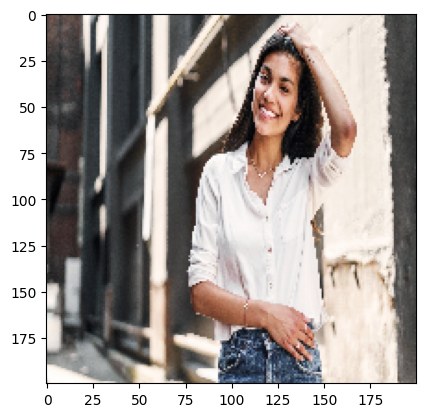

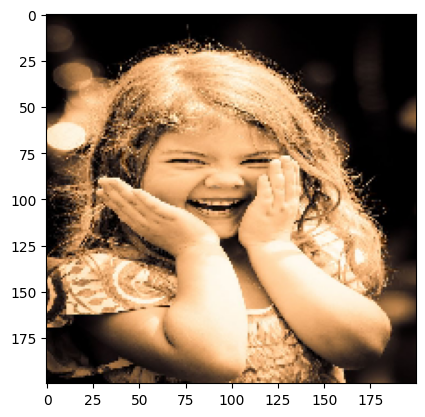

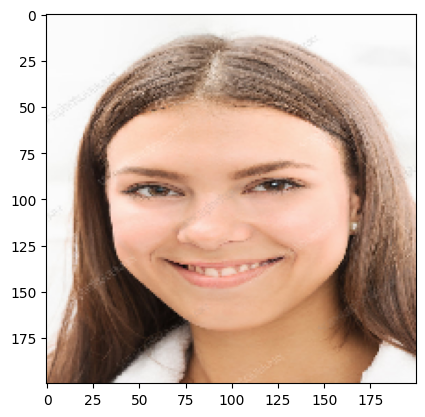

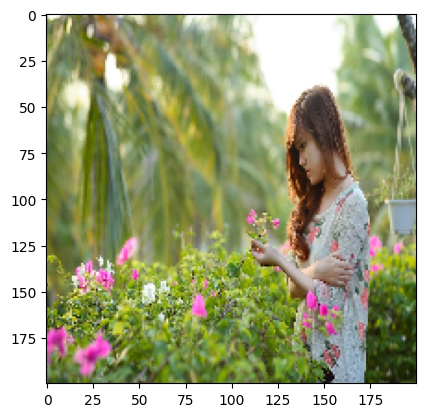

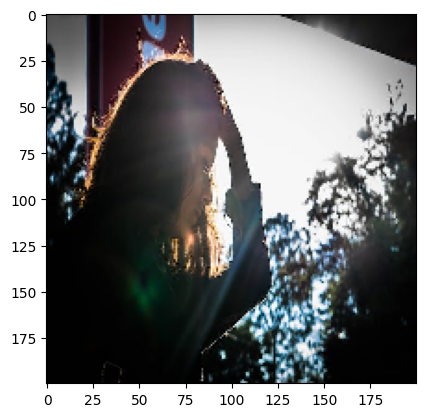

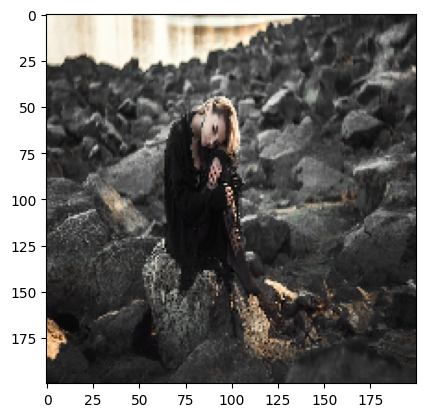

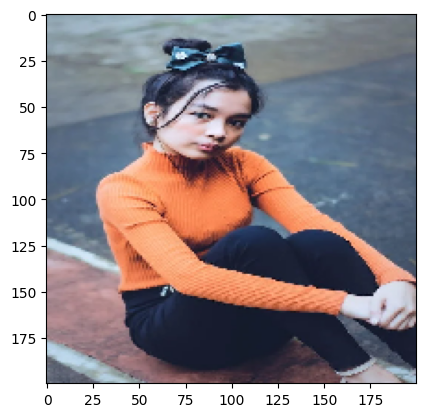

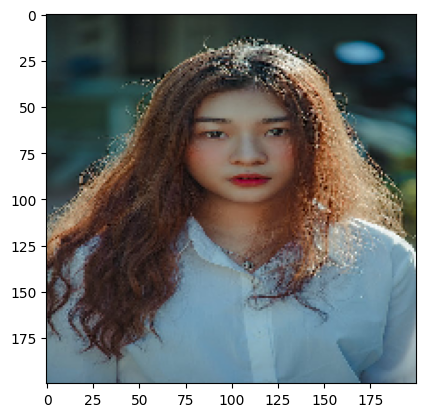

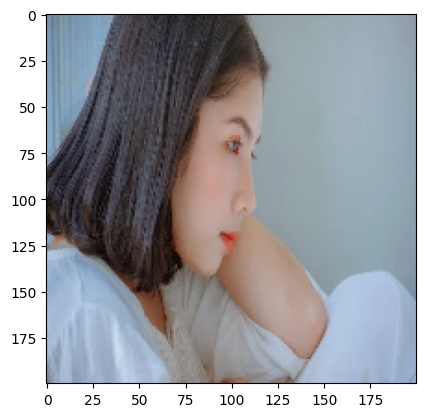

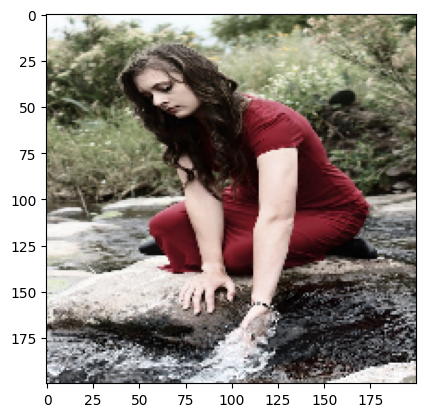

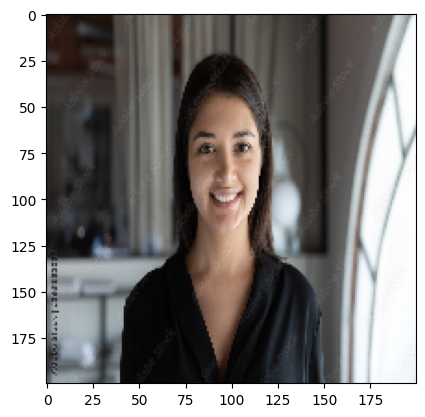

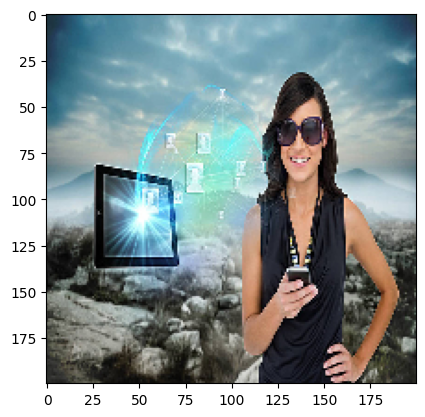

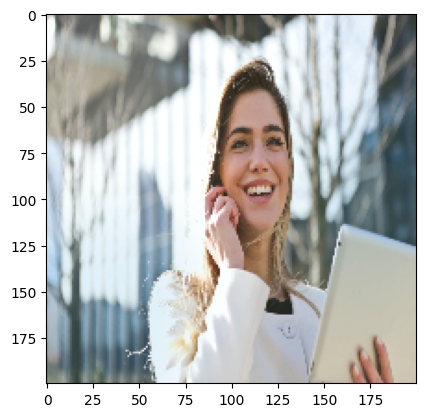

In [17]:
dir_path = r'/content/drive/MyDrive/dataset/test'
for i in os.listdir(dir_path ):
    # print(i)
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

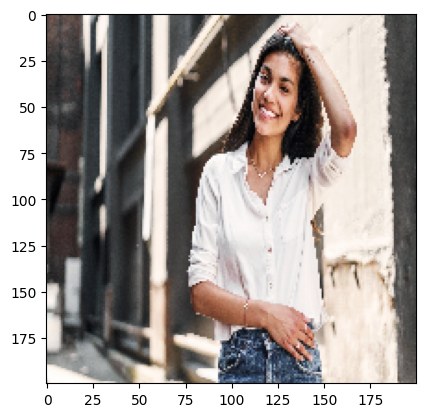

1/1 [==============================] - 0s 250ms/step
 i am not happy


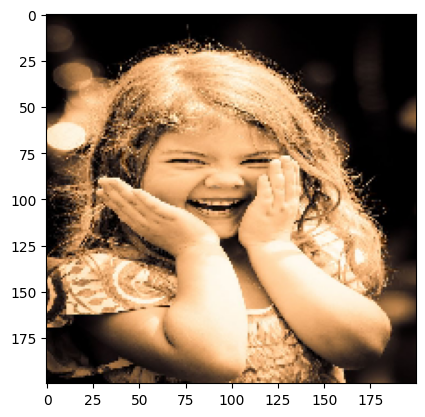

1/1 [==============================] - 0s 18ms/step
 i am not happy


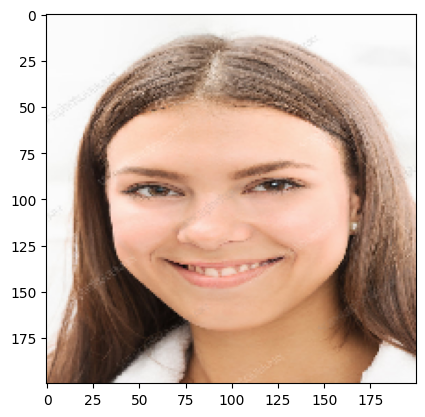

1/1 [==============================] - 0s 18ms/step
 i am not happy


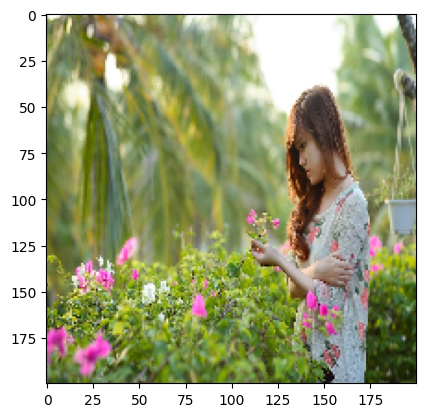

1/1 [==============================] - 0s 20ms/step
i am happy


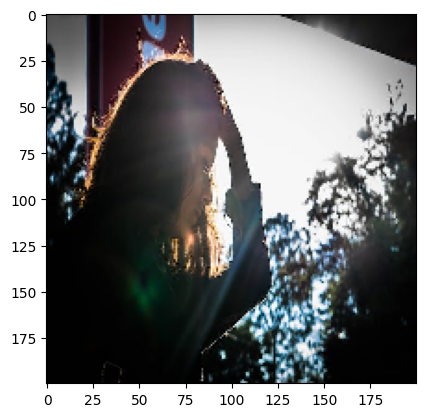

1/1 [==============================] - 0s 28ms/step
i am happy


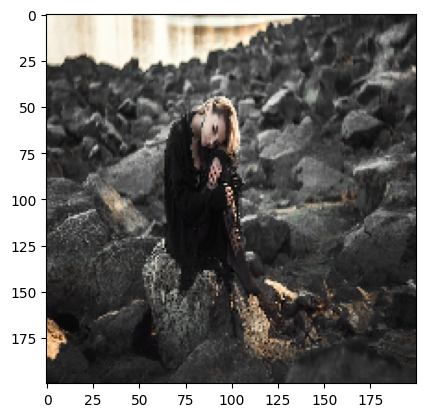

1/1 [==============================] - 0s 19ms/step
i am happy


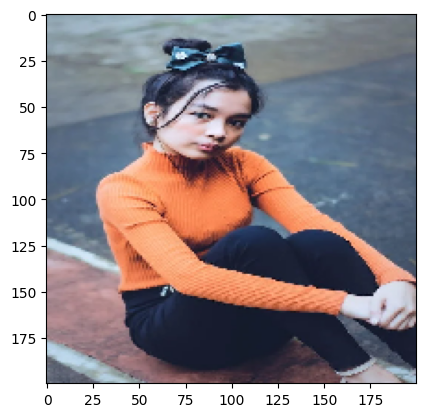

1/1 [==============================] - 0s 21ms/step
i am happy


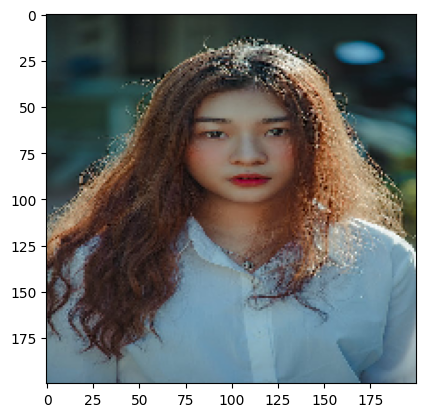

1/1 [==============================] - 0s 22ms/step
i am happy


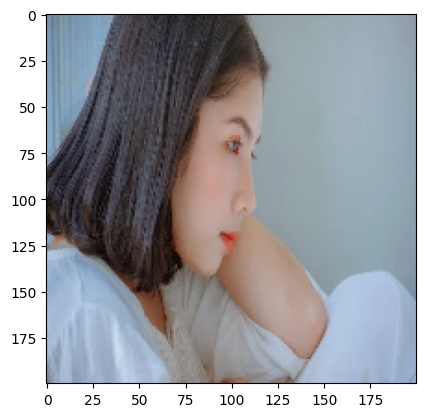

1/1 [==============================] - 0s 24ms/step
 i am not happy


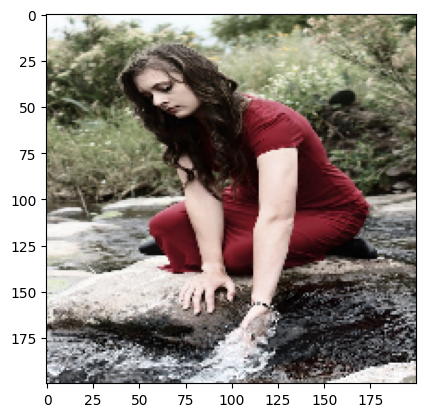

1/1 [==============================] - 0s 26ms/step
i am happy


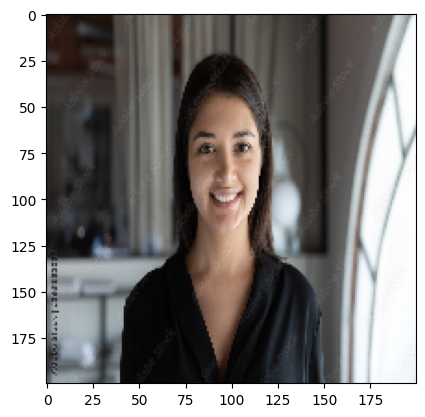

1/1 [==============================] - 0s 25ms/step
 i am not happy


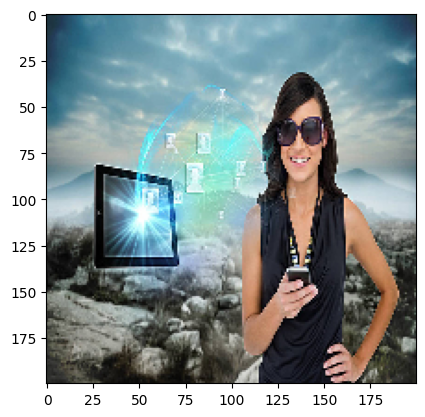

1/1 [==============================] - 0s 34ms/step
 i am not happy


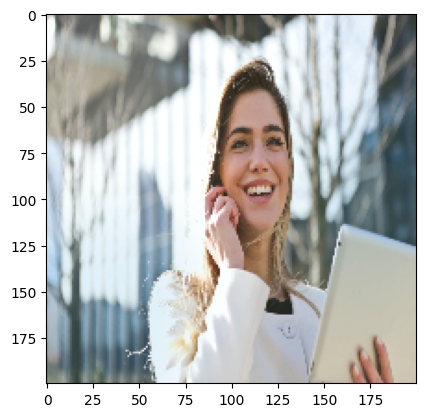

1/1 [==============================] - 0s 26ms/step
 i am not happy


In [18]:
dir_path = '/content/drive/MyDrive/dataset/test'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    if val == 0:
        print( ' i am not happy')
    else:
        print('i am happy')